In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df = pd.read_csv('./american-modal-share.csv')
df.head(100)

,Urbanized area (top 15 by # of commuters),Car drove alone,Carpool,Transit,Bike,Walk,Other,Home
0,"New York--Newark, NY--NJ--CT",49,6,32,0.7,6,2,5
1,"Los Angeles--Long Beach--Anaheim, CA",75,10,5,0.7,3,1,6
2,"Chicago, IL--IN",68,8,13,0.7,3,2,6
3,"Dallas--Fort Worth--Arlington, TX",80,10,2,0.1,1,1,6
4,"Miami, FL",78,9,3,0.7,1,2,6
5,"Washington, DC--VA--MD",63,9,15,1.0,4,2,6
6,"Houston, TX",81,10,2,0.2,1,1,5
7,"Philadelphia, PA--NJ--DE--MD",71,7,11,0.6,4,1,5
8,"Atlanta, GA",77,9,3,0.0,1,2,8
9,"Boston, MA--NH--RI",65,7,14,1.0,6,2,5


In [108]:
df.columns

Index(['Urbanized area (top 15 by # of commuters)', 'Car drove alone',
       'Carpool', 'Transit', 'Bike', 'Walk', 'Other', 'Home'],
      dtype='object')

In [109]:
norm_df = df.loc[:, df.columns != df.columns[0]]
norm_df = norm_df.div(norm_df.sum(axis=1), axis=0)
norm_df.head()

,Car drove alone,Carpool,Transit,Bike,Walk,Other,Home
0,0.486594,0.059583,0.317776,0.006951,0.059583,0.019861,0.049652
1,0.744786,0.099305,0.049652,0.006951,0.029791,0.009930,0.059583
2,0.675273,0.079444,0.129096,0.006951,0.029791,0.019861,0.059583
3,0.799201,0.099900,0.019980,0.000999,0.009990,0.009990,0.059940
4,0.782347,0.090271,0.030090,0.007021,0.010030,0.020060,0.060181


In [110]:
norm_df.insert(0, df.columns[0], df[df.columns[0]])
norm_df.head()

,Urbanized area (top 15 by # of commuters),Car drove alone,Carpool,Transit,Bike,Walk,Other,Home
0,"New York--Newark, NY--NJ--CT",0.486594,0.059583,0.317776,0.006951,0.059583,0.019861,0.049652
1,"Los Angeles--Long Beach--Anaheim, CA",0.744786,0.099305,0.049652,0.006951,0.029791,0.009930,0.059583
2,"Chicago, IL--IN",0.675273,0.079444,0.129096,0.006951,0.029791,0.019861,0.059583
3,"Dallas--Fort Worth--Arlington, TX",0.799201,0.099900,0.019980,0.000999,0.009990,0.009990,0.059940
4,"Miami, FL",0.782347,0.090271,0.030090,0.007021,0.010030,0.020060,0.060181


In [111]:
df = norm_df

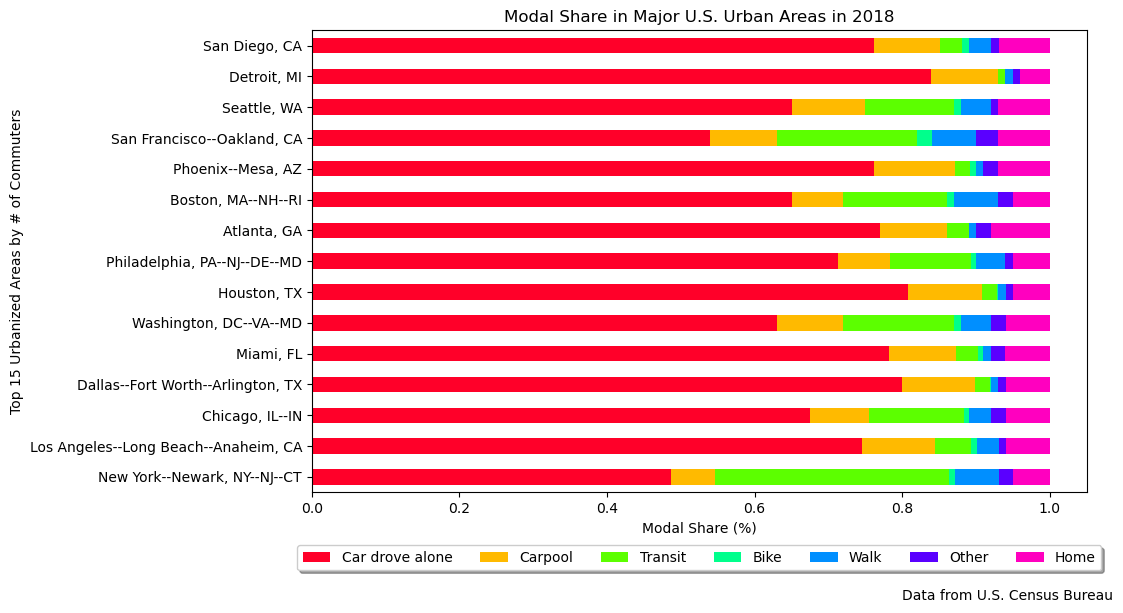

In [119]:
df.plot(x=0,
    kind='barh',
       stacked=True,
       colormap='gist_rainbow',
       figsize=(10, 6))
plt.title('Modal Share in Major U.S. Urban Areas in 2018', loc='center')
plt.legend(loc='upper center', ncol=7, bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True)
plt.ylabel('Top 15 Urbanized Areas by # of Commuters')
plt.xlabel('Modal Share (%)')
plt.text(0.8, -4, 'Data from U.S. Census Bureau')
plt.show()